In [42]:
import numpy as np
import matplotlib.pyplot as plt

def alpha_n(V):
    return 0.01*(V-10)/(1-np.exp((10-V)/10))

def beta_n(V):
    return 0.125*np.exp(-V/80)

def alpha_m(V):
    return 0.1*(V-25)/(1-np.exp((25-V)/10))

def beta_m(V):
    return 4*np.exp(-V/18)

def alpha_h(V):
    return 0.07*np.exp(-V/20)

def beta_h(V):
    return 1/(1 + np.exp((30-V)/10))


class equation:
    def __init__(self, start_V, dt = 0.1):
        self.dt = dt
        # constants
        self.C = 1
        self.ENa = 120
        self.EK = -12
        self.EL = 10.6
        
        self.gNa = 120
        self.gK = 36
        self.gL = 0.3


        self.gates_props = {
            'm': [alpha_m, beta_m, lambda:self.m],
            'n': [alpha_n, beta_n, lambda:self.n],
            'h': [alpha_h, beta_h, lambda:self.h]
        }

        # params
        self.V = start_V
        self.m = 0
        self.h = 0
        self.n = 0


    @property
    def dV_dt(self):
        return -(self.INa + self.IK + self.Ileak) / self.C
    
    @property
    def INa(self):
        return self.gNa*self.h*self.m**3 * (self.V - self.ENa)
    
    @property
    def IK(self):
        return self.gK*self.n**4*(self.V - self.EK)
    
    @property
    def Ileak(self):
        return self.gL*(self.V - self.EL)
    
    def dp_dt(self, letter:str):
        a, b, q = self.gates_props[letter]
        q = q()
        return a(self.V)*(1-q)-b(self.V)*q

    def update(self):
        self.V, self.m, self.n, self.h = self.V+self.dV_dt*self.dt, self.m+self.dp_dt('m')*self.dt, self.n+self.dp_dt('n')*self.dt, self.h+self.dp_dt('h')*self.dt

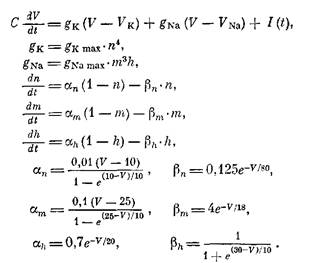

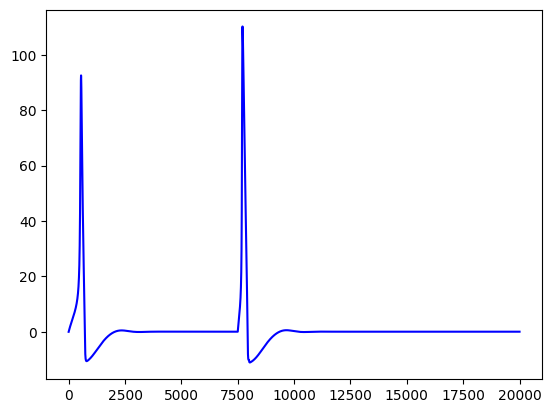

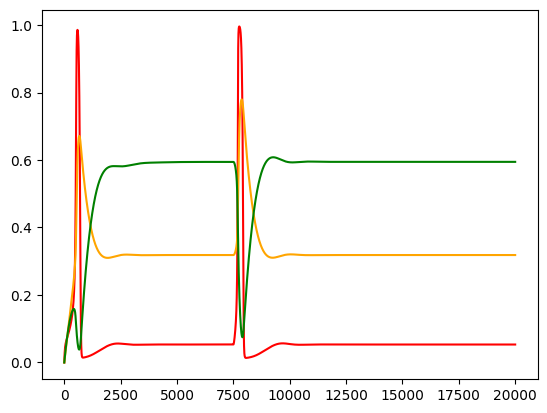

In [51]:
S = equation(0, dt = 0.01)
V = []
m = []
n = []
h = []
for i in range(20000):
    if 7500 < i < 8000:
        S.V += 0.1

    V.append(S.V)
    m.append(S.m)
    n.append(S.n)
    h.append(S.h)
    S.update()

plt.plot(V, c = 'blue')
plt.show()
plt.plot(m, c = 'red')
plt.plot(n, c = 'orange')
plt.plot(h, c = 'green')
plt.show()